# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [1]:
%matplotlib inline
# %matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as matcolors
import numpy as np

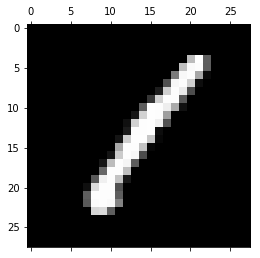

In [2]:
# (1 point) load train data, save class labels, plot first point as a digit
sample_size = 5000
train = pd.read_csv("train.csv")
labels = train["label"].values[:sample_size]
train_data = train.drop("label", axis=1).values[:sample_size]

# manually chosen colors
colors = ["#DA1616", "#DA9C16", "#ABDA16", "#3CDA16", "#16DA5E",
         "#16DAC4", "#167CDA", "#4816DA", "#B716DA", "#76414F"]
plt.gray() 
plt.matshow(train_data[0].reshape(28, 28)) 
plt.show()

In [3]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two
# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

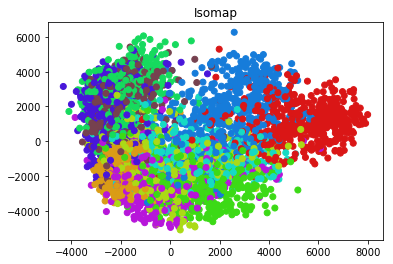

In [4]:
from sklearn import manifold

n_neighbors = 10
n_components = 2

# Isomap
IsoFit = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components).fit(train_data)
Y_isomap = IsoFit.transform(train_data)
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('Isomap')
plt.show()

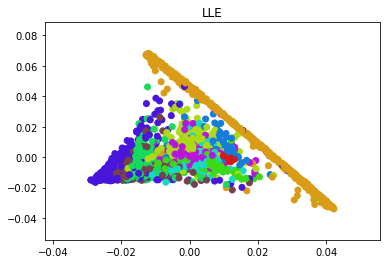

In [5]:
#LLE
Y = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='auto', method='standard').fit_transform(train_data)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('LLE')
plt.show()

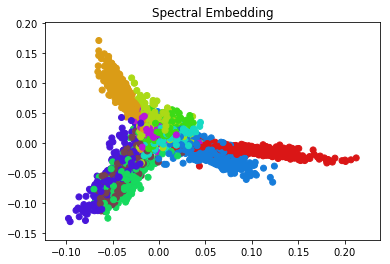

In [6]:
#Spectral Embedding
Y = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components).fit_transform(train_data)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('Spectral Embedding')
plt.show()

In [7]:
#LTSA
Y = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='auto', method="ltsa").fit_transform(train_data)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('LTSA')
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\decomp_lu.py:71: RuntimeWarning: Diagonal number 11 is exactly zero. Singular matrix.
  RuntimeWarning)


ValueError: Error in determining null-space with ARPACK. Error message: 'ARPACK error 3: No shifts could be applied during a cycle of the Implicitly restarted Arnoldi iteration. One possibility is to increase the size of NCV relative to NEV. '. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

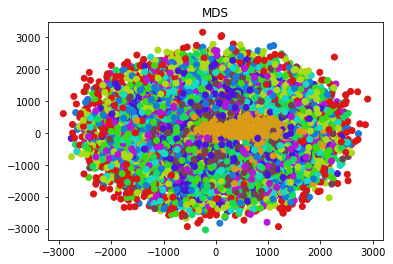

In [8]:
#MDS
Y = manifold.MDS(n_components=n_components,  max_iter=100, n_init=1).fit_transform(train_data)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('MDS')
plt.show()

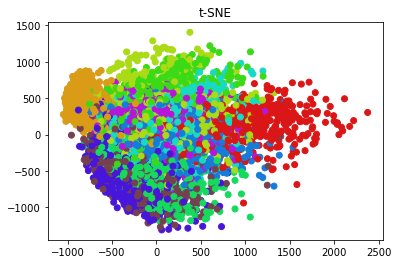

In [9]:
#t-SNE
Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(train_data)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=matcolors.ListedColormap(colors))
plt.title('t-SNE')
plt.show()

Random out-of-sample point:



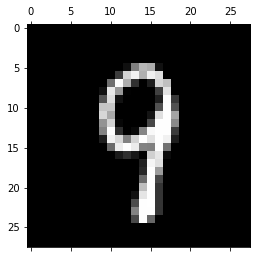

Label:	 9


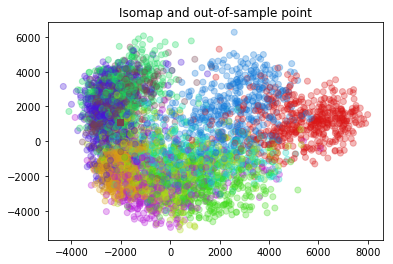

In [12]:
#Isomap to an arbirtrary point
#Get random point from unused data
current_state = np.random.get_state()
np.random.seed(0)
idx = np.random.randint(sample_size, train.shape[0])
np.random.set_state(current_state)

point = train.drop("label", axis=1).values[idx]
label = train["label"][idx]

print("Random out-of-sample point:\n")
plt.gray()
plt.matshow(point.reshape(28, 28))
plt.show()
print("Label:\t", label)

result = IsoFit.transform(point.reshape(1, -1))

#plot result among other points
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], c=labels, cmap=matcolors.ListedColormap(colors), alpha=0.3)
plt.scatter(result[:, 0], result[:, 1], c=colors[label], marker='s')
plt.title('Isomap and out-of-sample point')
plt.show()

Isomap легко отделяет некоторые два класса, но остальные плохо разделены и заметно пересекаются.
LLE выделяет один класс, но остальные тоже перемешиваются.
Метод спектральных вложений выделяет уже пять классов, и остальные пересекаются в меньшей степени, чем в других методах.
MDS расположил классы по концентрическим эллипсам, но в целом они сильно перемешаны.
t-SNE хорошо выделил только два класса.
В целом, метод спектральных вложений показал лучшие результаты, позволив точно визуализировать классы на плоскости.